In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Q2.csv")
X = df.drop("Y", axis=1).values
Y = df["Y"].values

Y=np.expand_dims(Y,axis=1)
Y=np.where(Y==-1,0,Y)
print(Y.shape)

one = np.ones((X.shape[0],1))
X = np.column_stack((X,one))
print(X.shape)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=72)
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=92)

(100, 1)
(100, 3)


In [3]:
def pred(w,x,threshold=0.5):
    pred = 1/(1 + np.exp(-x@w))

    for i in range(len(pred)):
        if pred[i] >= threshold:
            pred[i] = 1
        else:
            pred[i] = 0

    return pred

In [4]:
w = np.zeros((3,1))
m = x_train.shape[0]

lr = 0.1
epochs = 7300

train_acc = []
val_acc = []
errors = []

for i in range(epochs):
    h = 1/(1 + np.exp(-(x_train@w))) # h is the prediction
    w = w - lr*(1/m)*x_train.T@(h-y_train)

    train_acc.append((pred(w,x_train)==y_train).sum()/len(y_train))
    val_acc.append((pred(w,x_val)==y_val).sum()/len(y_val))

    esp=1e-15
    error = (-1/m)*np.sum(y_train*np.log(h+esp) + (1-y_train)*np.log(1-h+esp))
    errors.append(error)
    print(f"epoch {i+1}, error:  ", error)

print(w)
print(train_acc)
print(val_acc)
   

epoch 1, error:   0.6931471805599431
epoch 2, error:   0.6367039111278758
epoch 3, error:   0.5886803193501299
epoch 4, error:   0.5476184323087394
epoch 5, error:   0.5123038899844639
epoch 6, error:   0.4817283877457334
epoch 7, error:   0.4550682575366763
epoch 8, error:   0.43165563397651735
epoch 9, error:   0.4109515109261037
epoch 10, error:   0.39252079738838047
epoch 11, error:   0.3760113563252262
epoch 12, error:   0.3611368909993747
epoch 13, error:   0.34766331714408255
epoch 14, error:   0.3353980394928856
epoch 15, error:   0.3241815583958347
epoch 16, error:   0.31388090852606837
epoch 17, error:   0.30438452079904227
epoch 18, error:   0.2955981848677065
epoch 19, error:   0.2874418617356412
epoch 20, error:   0.2798471540944678
epoch 21, error:   0.2727552871746111
epoch 22, error:   0.26611548755451936
epoch 23, error:   0.2598836737324974
epoch 24, error:   0.2540213922478082
epoch 25, error:   0.24849494828093158
epoch 26, error:   0.24327469115793582
epoch 27, err

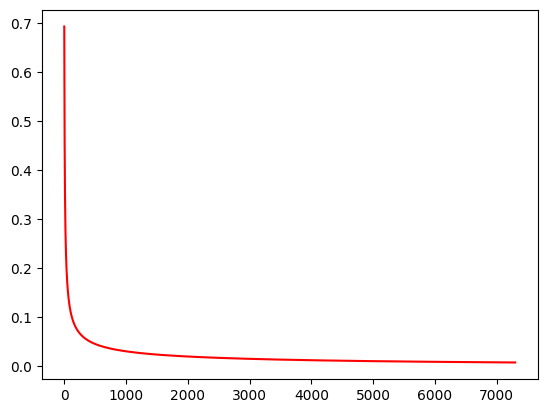

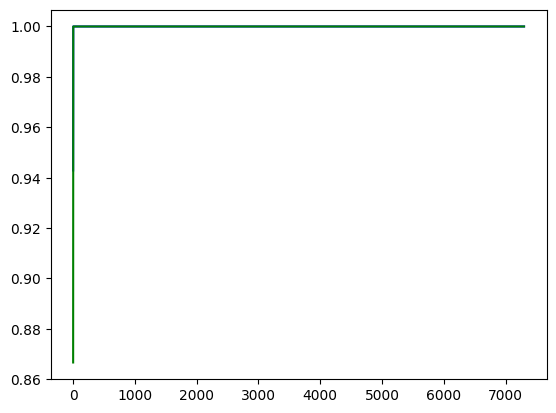

In [5]:
epochs = np.arange(epochs)

plt.plot(epochs, errors, label="Training Error", color="red")
plt.show()
plt.plot(epochs, train_acc, label="Train Accuracy", color="blue")
plt.plot(epochs, val_acc, label="Validation Accuracy", color="green")
plt.show()

In [6]:
train = pred(w,x_train)
val = pred(w,x_val)
test = pred(w,x_test)
print(train)

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [7]:
def confusion(predictions,y):
    tp = np.sum((predictions==1)&(y==1))
    fp = np.sum((predictions==1)&(y==0))
    tn = np.sum((predictions==0)&(y==0))
    fn = np.sum((predictions==0)&(y==1))

    matrix = np.array([[tp,fp],
                       [fn,tn]])
    
    eps = 1e-15
    precision = tp/(tp+fp+eps)
    recall = tp/(tp+fn+eps)
    f1 = 2*precision*recall/(precision+recall+eps)

    return matrix,precision,recall,f1

In [8]:
matrix,precision,recall,f1 = confusion(train,y_train)
print(f"train: \n confusion:{matrix}\n precision:{precision}\n recall:{recall}\n f1:{f1}")

train: 
 confusion:[[35  0]
 [ 0 35]]
 precision:1.0
 recall:1.0
 f1:0.9999999999999996


In [9]:
matrix,precision,recall,f1 = confusion(val,y_val)
print(f"val: \n confusion:{matrix}\n precision:{precision}\n recall:{recall}\n f1:{f1}")

val: 
 confusion:[[9 0]
 [0 6]]
 precision:0.9999999999999998
 recall:0.9999999999999998
 f1:0.9999999999999993


In [10]:
matrix,precision,recall,f1 = confusion(test,y_test)
print(f"test: \n confusion:{matrix}\n precision:{precision}\n recall:{recall}\n f1:{f1}")

test: 
 confusion:[[5 0]
 [1 9]]
 precision:0.9999999999999998
 recall:0.8333333333333333
 f1:0.9090909090909084


In [11]:
thresholds = np.arange(0,1,0.05)
print(thresholds)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]


In [12]:
precisions = []
recalls = []
for i in thresholds:
    train = pred(w,x_train,i)
    matrix,precision,recall,f1 = confusion(train,y_train)
    precisions.append(precision)
    recalls.append(recall)
print(precisions)
print(recalls)

[np.float64(0.5), np.float64(0.9722222222222222), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]
[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9714285714285714), np.float64(0.9142857142857143)]


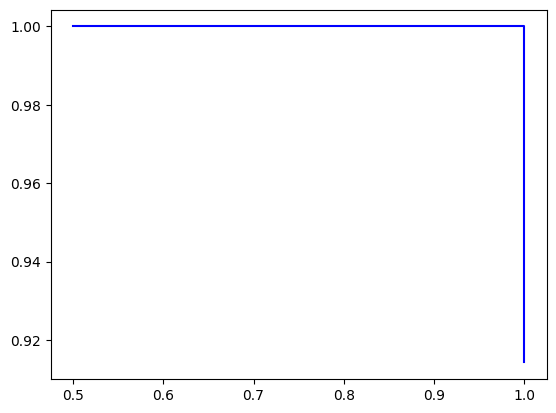

In [13]:
plt.plot(precisions,recalls,color="blue")
plt.show()

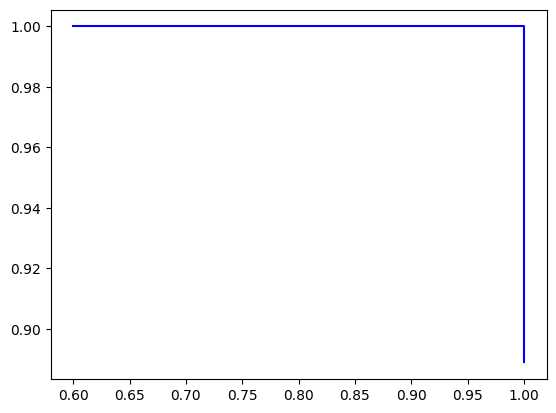

In [14]:
precisions = []
recalls = []
for i in thresholds:
    val = pred(w,x_val,i)
    matrix,precision,recall,f1 = confusion(val,y_val)
    precisions.append(precision)
    recalls.append(recall)

plt.plot(precisions,recalls,color="blue")
plt.show()

[np.float64(0.39999999999999997), np.float64(0.857142857142857), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998)]
[np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.9999999999999999), np.float64(0.8333333333333333), np.float64(0.8333333333333333), np.flo

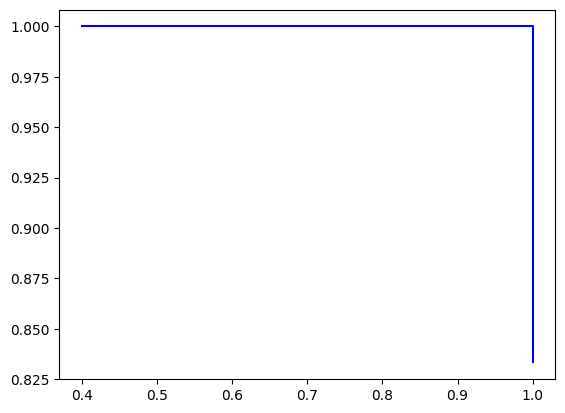

In [15]:
precisions = []
recalls = []
for i in thresholds:
    test = pred(w,x_test,i)
    matrix,precision,recall,f1 = confusion(test,y_test)
    precisions.append(precision)
    recalls.append(recall)
print(precisions)
print(recalls)

plt.plot(precisions,recalls,color="blue")
plt.show()

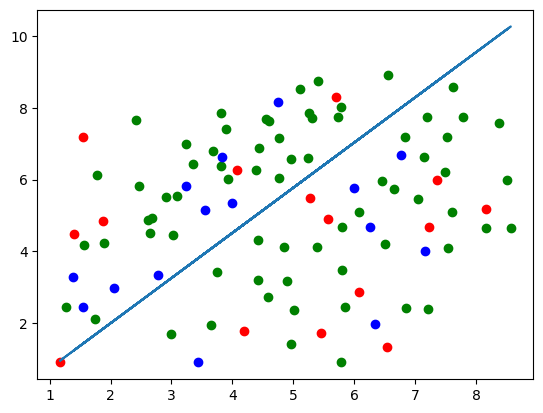

In [16]:
plt.scatter(x_train[:,0],x_train[:,1],c="green")
plt.scatter(x_val[:,0],x_val[:,1],c="blue")
plt.scatter(x_test[:,0],x_test[:,1],c="red")
# plt.scatter(df[df["Y"]==-1]["X1"],df[df["Y"]==-1]["X2"],c="blue")

plt.plot(df["X1"],-(w[2]+w[0]*df["X1"])/w[1])